Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1600, 300)         3000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1600, 64)          57664     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1600, 32)          6176      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1600, 16)          1552      
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)             0         
______________________

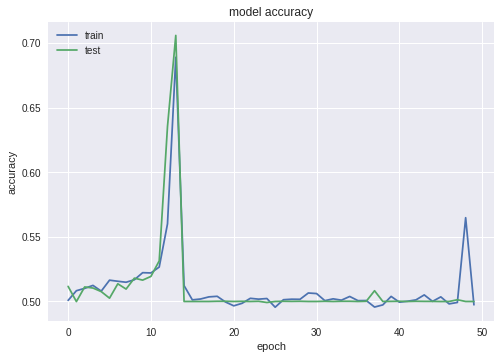

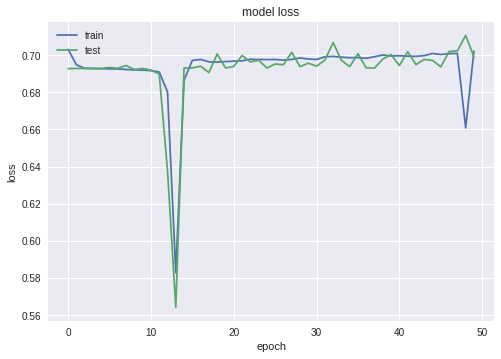

In [1]:
import numpy
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Convolution1D, Flatten, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import TensorBoard
import os
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy

# Using keras to load the dataset with the top_words
top_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# Pad the sequences to the same length
max_review_length = 1600
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

# Using embedding from Keras
embedding_vecor_length = 300
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))

# Convolutional model (3x conv, flatten, 2x dense)
model.add(Convolution1D(64, 3, padding='same'))
model.add(Convolution1D(32, 3, padding='same'))
model.add(Convolution1D(16, 3, padding='same'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(180,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

# Log to tensorboard
#tensorBoardCallback = TensorBoard(log_dir='./logs', write_graph=True)

#lr: float >= 0. Learning rate. momentum: float >= 0. 
#decay: float >= 0. Learning rate decay over each update. 

#------------------------------------------------------------------------------
# initiate RMSprop optimizer
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
#------------------------------------------------------------------------------

#Parameter that accelerates SGD in the relevant direction and dampens oscillations. 
#nesterov: boolean. Whether to apply Nesterov momentum.
#------------------------------------------------------------------------------
# initiate SGD with momentum optimizer
opt = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# initiate SGD no momentum optimizer
#opt = keras.optimizers.SGD(lr=0.01, decay=1e-6)
#------------------------------------------------------------------------------

#------------------------------------------------------------------------------
#beta_1: float, 0 < beta < 1. Generally close to 1.
#beta_2: float, 0 < beta < 1. Generally close to 1.
#epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
#amsgrad: boolean. Whether to apply the AMSGrad variant of this algorithm from the paper "On the Convergence of Adam and Beyond"
#opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#------------------------------------------------------------------------------




model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

print(model.summary())

#model.fit(X_train, y_train, epochs=3, callbacks=[tensorBoardCallback], batch_size=64)
history = model.fit(X_train, y_train, epochs=50, batch_size=64,validation_data=(X_test, y_test))

# Evaluation on the test set
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

#plot model layers
plot_model(model)
SVG(model_to_dot(model).create(prog='dot', format='svg'))
history

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
print(history.history)
model.fit()

{'loss': [0.377043520822525, 0.16002206710219383, 0.05403816777557135], 'acc': [0.8260399999618531, 0.93972, 0.98276]}
